# HW 5

Bayes' theorem 

In [75]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle as pk

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,10)

### Problem 1
- Create a normal data distribution with a sigma of 2 with one million events
- Create a signal of random strength on interval 0 to 20 with a uniform distribution. (this is the P(signal)  )
- Add signal to background to create fake data radings (p(data|signal)*p(signal))
- Make 2-d Histogram plots

Text(0.5, 0, 'Observed data, $P(d|s)$')

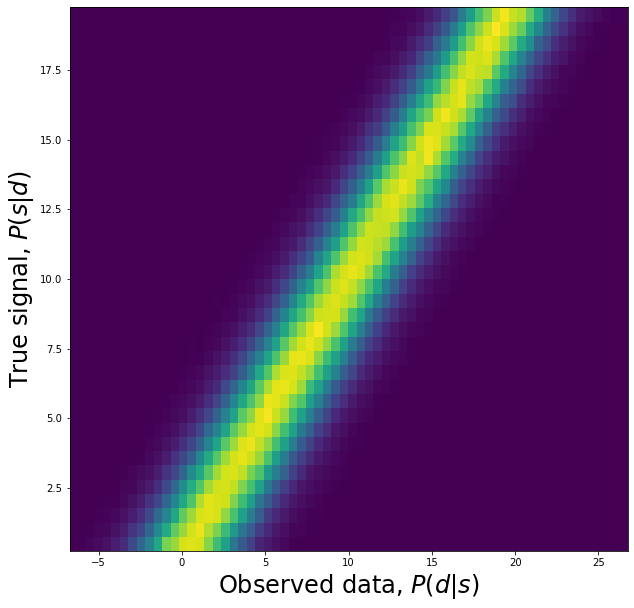

In [76]:
bkgd = stats.norm.rvs(loc = 0., scale = 2, size = 1000000)

#need to change strengnth?
signal = stats.uniform.rvs(loc = 0, scale = 20, size = 1000000)

#---given code---

#the is the combination of background data and injected signal 
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2 = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

From the 2-d histogram above, we are able to see the corelation between observed data and the true signal. 

Note the the variable Psd has a shape of (67, 39).

It takes 68 steps on the x axis (dataedges), from (-7,27). So each step along the x axis is in lengths of 34/68 = 0.5.

It takes 40 steps on the 7 axis (signaledges, from (0,20). So each step along the y axis is in length of 20/40 = 0.5.


### Problem 1b
- Select a true injected signal and plot P(d|s)
- Clearly explain plot

Because the steps on each axis are in steps of 0.5, need to double the index number of the desired value.

Looking for a True value of 10, the index is 20. 

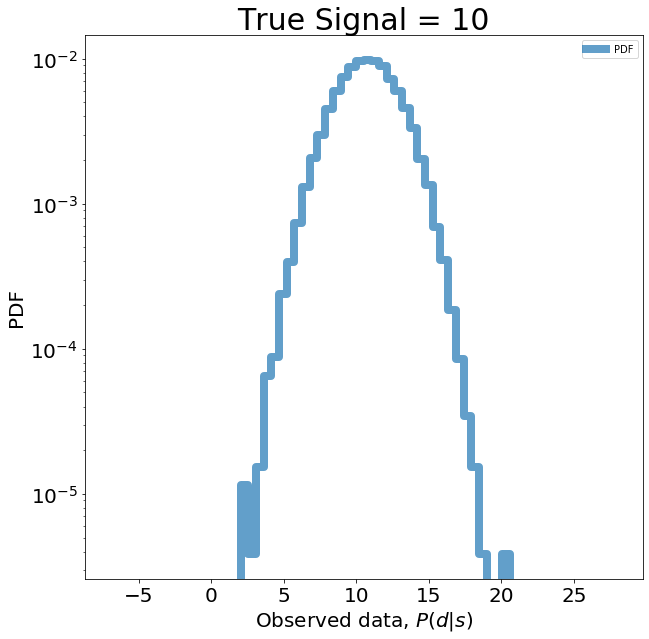

In [77]:
#-----Plot Horizontal Sclice ------
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

#re-shape x-axis to same size as Psd[:,10]
dataedges = np.linspace(-7,28, 67)

#calculate index (in steps of 0.5)
stats.norm.pdf(Psd[:,20])
ax.step(dataedges,Psd[:,20], linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('Observed data, $P(d|s)$', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('True Signal = 10', size = 30)
plt.tick_params(labelsize = 20)
plt.legend()
plt.show()

In this plot we are seeing the data taken as a horizontal sclice through the 2-d histogram plot above, at a True signal value of 10. :ooking at a horizontal stripe along where the true signal equals 10, it looks like this probability distribtuion of observed data is correct.

This plot is showing us a probability density graph of the observed data values if the True signal equals 10, and we can see that it is relatively evenly distributed around 10.

The highest probability Observed data value is 10, indicating that at a True signal value of 10 the Observed data value is also mostlikely 10.

### Problem 1c
- Select an observed data value, and plot P(s|d)
- Clearly explain plot

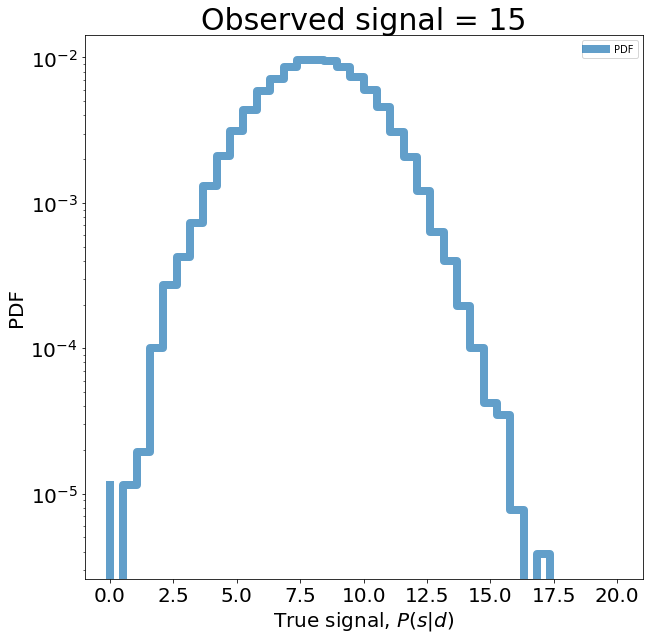

In [78]:
#-----Plot Vertical------
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

#re-shaping x axis to same size as Psd[10,:]
signaledges = np.linspace(0,20,39)

ax.step(signaledges,Psd[30,:], linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('True signal, $P(s|d)$', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('Observed signal = 15', size = 30)
plt.tick_params(labelsize = 20)
plt.legend()
plt.show()

In this plot we are seeing the data taken as a vertical sclice through the 2-d histogram plot above, at a observed signal value of 15.

This plot is showing us a probability density graph of the True signal data values if the observed signal equals 15. Here we can see that the most probable value is inbetween 7.5 and 10, indicating that if the observed signal value is 15, it is more probable that the true value was less than 15.

## Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.


Here we are setting our background to have a mean of 5.

Text(0.5, 0, 'Observed data, $P(d|s)$')

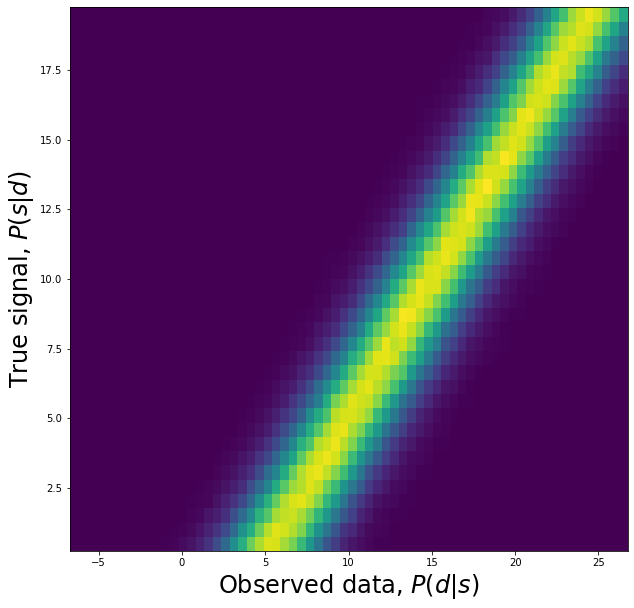

In [84]:
bkgd = stats.norm.rvs(loc = 5, scale = 2, size = 1000000)

#need to change strengnth?
signal = stats.uniform.rvs(loc = 0, scale = 20, size = 1000000)

#---given code---

#the is the combination of background data and injected signal 
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2 = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Making the background data have a mean of 5 instead of zero, we can see that it shifted the yellow stripe of highly corelated signals over to the right, starting at 5. 

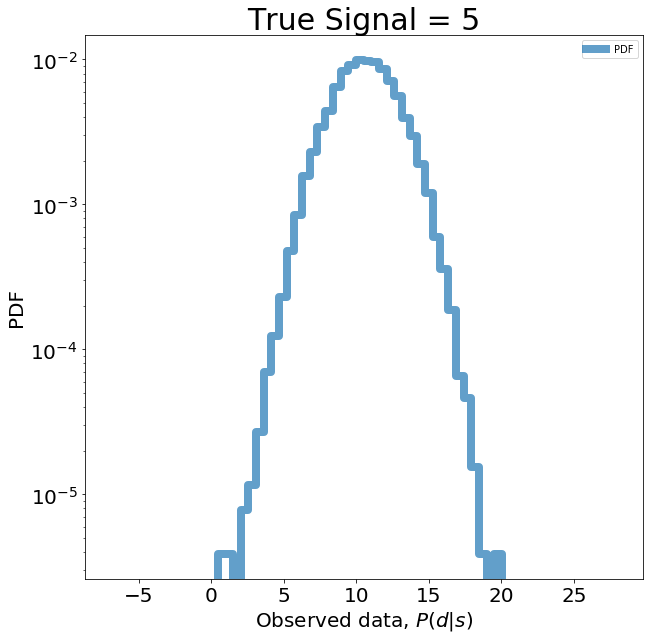

In [85]:
#-----Plot Amplitude------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

#re-shape x-axis to same size as Psd[:,10]
dataedges = np.linspace(-7,28, 67)

ax.step(dataedges,Psd[:,10], linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('Observed data, $P(d|s)$', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('True Signal = 5', size = 30)
plt.tick_params(labelsize = 20)
plt.legend()
plt.show()

Here we are looking at a plot of a horizontal sclice across the 2-d histogram plot. Over all this distribution looks even around the value 10, and looking at a horizontal stripe along where the true signal equals 5, it looks like this probability distribtuion of observed data is correct.

We can see that the probability of observing an observed data value of 10 is much higher than getting a vallue of 5 when the True signal equals 5. 



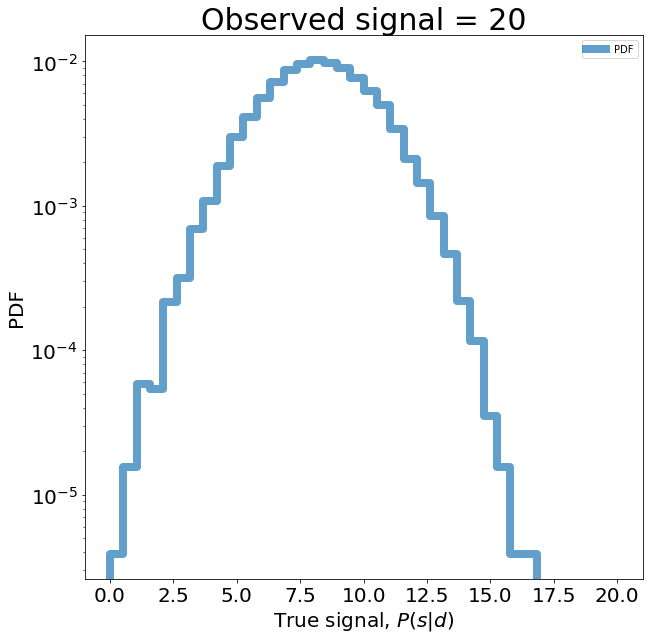

In [89]:
#-----Plot Vertical------
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

#re-shaping x axis to same size as Psd[10,:]
signaledges = np.linspace(0,20,39)

ax.step(signaledges,Psd[40,:], linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('True signal, $P(s|d)$', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('Observed signal = 20', size = 30)
plt.tick_params(labelsize = 20)
plt.legend()
plt.show()

In the plot above we are looking at a vertical stripe along the 2-d histogram plot when the Observed Data value equals 20. By looking at the 2-d plot and seeing where the yellow line of high corelation crosses the True signal axis, it looks like our probability distribution is correct. This plot tells us that if we get an Observed data value of 20, the most likely value for the True signal is inbetween 7.5 and 10.